In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

>#### reading DATA from csv file

In [3]:
data = pd.read_csv("Data.csv")                  
data.shape

(189085, 12)

In [4]:
# confirming operation
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Customer ID,Sales,Datetime,Period,Day,Month,City State
0,0,176558,USB-C Charging Cable,2,11.95,75315,23.90,2019-04-19 08:46:00,8,Friday,Apr,Dallas TX
1,1,176559,Bose SoundSport Headphones,1,99.99,59963,99.99,2019-04-07 22:30:00,22,Sunday,Apr,Boston MA
2,2,176560,Google Phone,1,600.00,25532,600.00,2019-04-12 14:38:00,14,Friday,Apr,Los Angeles CA
3,3,176560,Wired Headphones,1,11.99,25532,11.99,2019-04-12 14:38:00,14,Friday,Apr,Los Angeles CA
4,4,176561,Wired Headphones,1,11.99,89128,11.99,2019-04-30 09:27:00,9,Tuesday,Apr,Los Angeles CA


In [5]:
# dropping unwanted columns
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Customer ID,Sales,Datetime,Period,Day,Month,City State
189080,259353,AAA Batteries (4-pack),3,2.99,254883,8.97,2019-09-17 20:56:00,20,Tuesday,Sep,Los Angeles CA
189081,259354,iPhone,1,700.00,175553,700.00,2019-09-01 16:00:00,16,Sunday,Sep,San Francisco CA
189082,259355,iPhone,1,700.00,133937,700.00,2019-09-23 07:39:00,7,Monday,Sep,San Francisco CA
189083,259356,34in Ultrawide Monitor,1,379.99,189758,379.99,2019-09-19 17:30:00,17,Thursday,Sep,San Francisco CA
189084,259357,USB-C Charging Cable,1,11.95,276924,11.95,2019-09-30 00:18:00,0,Monday,Sep,San Francisco CA


> ### Data Analysis

#### Product Orders 2019 `pr_order`

In [6]:
# grouping dataset
pr_order = pd.DataFrame(data.groupby("Product")["Quantity Ordered"].sum())

# sorting dataset
pr_order.sort_values("Quantity Ordered", axis=0, ascending=False, inplace=True)

# Dataframe
pr_order

,Quantity Ordered
Product,
AAA Batteries (4-pack),31475
AA Batteries (4-pack),28241
USB-C Charging Cable,24301
Lightning Charging Cable,23713
Wired Headphones,20961
Apple Airpods Headphones,15865
Bose SoundSport Headphones,13548
27in FHD Monitor,7678
iPhone,7006


***
* **Most Ordered Product** - `USB-C Charging Cable` 
* **Least Ordered Product** - `LG Washing Machine` 
***

#### Product Gross Sales 2019  `pr_gross`

In [7]:
# grouping dataset
pr_gross = pd.DataFrame(data.groupby("Product")["Sales"].sum())

# sorting dataset
pr_gross.sort_values("Sales", axis=0, ascending=False, inplace=True)

# Dataframe
pr_gross  

,Sales
Product,
Macbook Pro Laptop,8165100.00
iPhone,4904200.00
ThinkPad Laptop,4177958.22
Google Phone,3390000.00
27in 4K Gaming Monitor,2468636.70
34in Ultrawide Monitor,2404576.72
Apple Airpods Headphones,2379750.00
Flatscreen TV,1474800.00
Bose SoundSport Headphones,1354664.52


***
* **Highest Grossing Product** - `Macbook Pro Laptop`	
* **Lowest Grossing Product** - `AAA Batteries (4-pack)`
***

### Why were `USB-C Charging Cables` the most sold, yet `Macbook Pro Laptop` the highest grossing?

**The chart below renders a visualization of Product Price and Orders against Products**

C:\Users\user\AppData\Local\Temp/ipykernel_9828/3990397979.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical", size=10)


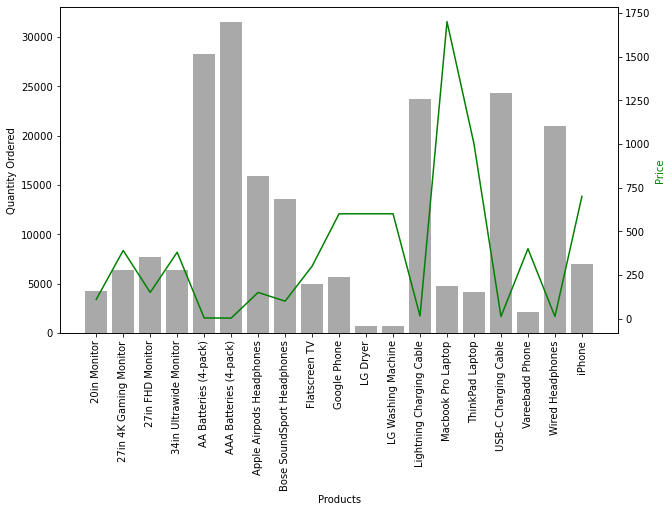

In [8]:
# setting chart parameters
product_Series = data.groupby('Product')
products = [product for product, df in product_Series]
n_orders = product_Series.sum()['Quantity Ordered']
prices = data.groupby('Product').mean()['Price Each']

# plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
ax1.bar(products, n_orders, color="darkgrey")
ax2.plot(products, prices, color="green")

# labelling plot
ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Price", color="green")
ax1.set_xticklabels(products, rotation="vertical", size=10)

plt.show()

#### Why?
* A `USB-C Charging Cable` is considerably less compared to a `Macbook Pro Laptop`

***
**The chart below renders a visualization of Product Orders and Sales, against Products**

To illustrate further;
Why `USB-C Charging Cable` was the most sold and `Macbook Pro Laptop` the highest grossing...
* let us visualize the data...
***

C:\Users\user\AppData\Local\Temp/ipykernel_9828/160267640.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical", size=10)


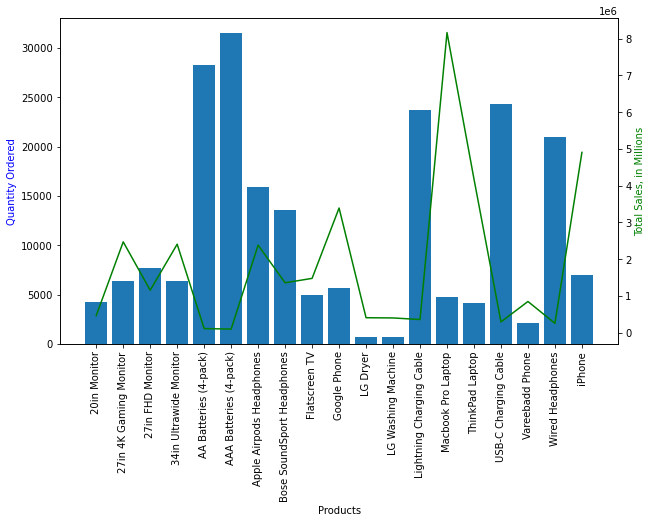

In [9]:
# setting chart parameters
product_Series = data.groupby('Product')
products = [product for product, df in product_Series]
n_orders = product_Series.sum()['Quantity Ordered']
sales = data.groupby('Product').sum()['Sales']

# plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
ax1.bar(products, n_orders)
ax2.plot(products, sales, color="green")

# labelling plot
ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered", color="blue")
ax2.set_ylabel("Total Sales, in Millions",  color="green")
ax1.set_xticklabels(products, rotation="vertical", size=10)

plt.show()

### *Monthly*

#### Most Ordered/Sold Product per month `most_spm`

In [10]:
# grouping dataset
most_spm = pd.DataFrame(data.groupby(["Month", "Product"])["Quantity Ordered"].sum().sort_values().groupby(level=0).tail(1))


# sorting dataset
most_spm.sort_values("Quantity Ordered", axis=0, ascending=False, inplace=True)

# Dataframe
most_spm

,,Quantity Ordered
Month,Product,
Apr,AAA Batteries (4-pack),5872
Dec,AAA Batteries (4-pack),4241
Oct,AAA Batteries (4-pack),3363
Nov,AAA Batteries (4-pack),3025
May,AAA Batteries (4-pack),2927
Jul,AAA Batteries (4-pack),2365
Jun,AAA Batteries (4-pack),2162
Aug,AAA Batteries (4-pack),2021
Feb,AAA Batteries (4-pack),1972


#### Highest grossing product per month `hg_prodpm`

In [11]:
# grouping dataset
hg_prodpm = pd.DataFrame(data.groupby(["Month", "Product"])["Sales"].sum().sort_values().groupby(level=0).tail(1))


# sorting dataset
hg_prodpm.sort_values("Sales", axis=0, ascending=False, inplace=True)

# Dataframe
hg_prodpm

,,Sales
Month,Product,
Apr,Macbook Pro Laptop,1540200.00
Dec,Macbook Pro Laptop,1093100.00
Oct,Macbook Pro Laptop,892500.00
May,Macbook Pro Laptop,793900.00
Nov,Macbook Pro Laptop,748000.00
Jul,Macbook Pro Laptop,625600.00
Jun,Macbook Pro Laptop,605200.00
Aug,Macbook Pro Laptop,508300.00
Sep,Macbook Pro Laptop,489600.00


#### Monthly Sales - `grouped_sales`

In [12]:
# getting total sales per month
grouped_sales = pd.DataFrame(data.groupby("Month")["Sales"].sum())
grouped_sales

,Sales
Month,
Apr,6770999.64
Aug,2244467.88
Dec,4613443.34
Feb,2202022.42
Jan,1822256.73
Jul,2647775.76
Jun,2577802.26
Mar,3207.50
May,3163166.04


Setting proper `Month` Index

In [13]:
# setting our DataFrame to a shorthand variable name
sales_df = pd.DataFrame(grouped_sales)

# month order
sort_month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
              "Jul", "Aug", "Sep", "Oct", "Nov"]

# resetting index
sales_df = sales_df.reset_index(drop=False)

# adding new month index, to help with categorical sorting
sales_df.index = pd.Categorical(sales_df['Month'], categories=sort_month, ordered=True)

# sorting with the month index and dropping it right after
sales_df = sales_df.sort_index().reset_index(drop = True)

In [14]:
sales_df

,Month,Sales
0,Jan,1822256.73
1,Feb,2202022.42
2,Mar,3207.50
3,Apr,6770999.64
4,May,3163166.04
5,Jun,2577802.26
6,Jul,2647775.76
7,Aug,2244467.88
8,Sep,2097560.13
9,Oct,3736726.88


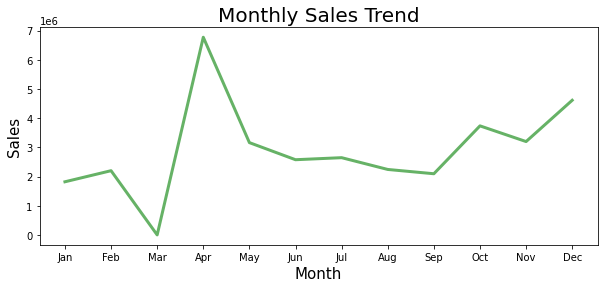

In [15]:
# visualizing dataframe
    # line plot; default plot is also line
plt.figure(figsize=(10, 4))
plt.plot(sales_df["Month"], sales_df["Sales"], linewidth=3, alpha=0.6, color="green")

    # setting plot characteristics
plt.title("Monthly Sales Trend", fontsize=20)
plt.xlabel("Month", size=15)
plt.ylabel("Sales", size=15)
plt.show()

#### Monthly Orders - `grouped_orders`

In [43]:
# getting total sales per month
grouped_orders = pd.DataFrame(data.groupby("Month")["Quantity Ordered"].count())
grouped_orders

,Quantity Ordered
Month,
Apr,36522
Aug,11961
Dec,24984
Feb,11975
Jan,9709
Jul,14293
Jun,13554
Mar,17
May,16594


In [44]:
# setting our DataFrame to a shorthand variable name
order_df = pd.DataFrame(grouped_orders)

# month order
sort_month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
              "Jul", "Aug", "Sep", "Oct", "Nov"]

# resetting index
order_df = order_df.reset_index(drop=False)

# adding new month index, to help with categorical sorting
order_df.index = pd.Categorical(order_df['Month'], categories=sort_month, ordered=True)

# sorting with the month index and dropping it right after
order_df = order_df.sort_index().reset_index(drop = True)

In [45]:
order_df

,Month,Quantity Ordered
0,Jan,9709
1,Feb,11975
2,Mar,17
3,Apr,36522
4,May,16594
5,Jun,13554
6,Jul,14293
7,Aug,11961
8,Sep,11621
9,Oct,20282


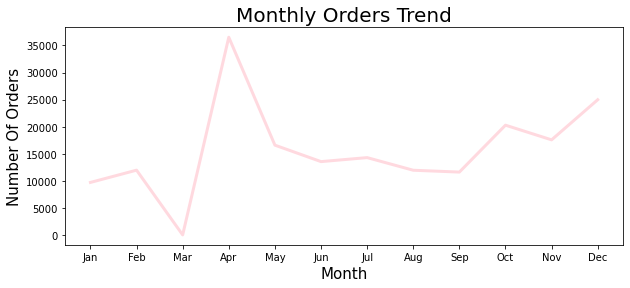

In [46]:
# visualizing dataframe
    # line plot; default plot is also line
plt.figure(figsize=(10, 4))
plt.plot(order_df["Month"], order_df["Quantity Ordered"], linewidth=3, alpha=0.6, color="pink")

    # setting plot characteristics
plt.title("Monthly Orders Trend", fontsize=20)
plt.xlabel("Month", size=15)
plt.ylabel("Number Of Orders", size=15)
plt.show()

***
The `Monthly Sales Trend` and `Monthly Orders Trend` charts seem quite similarly, don't they?
* We will look closely at just why, using `statistical concepts` like `Correlation Co-efficient` later on 
***

### *Daily*

***
### Peak Period 
* At what time of the day were orders most likely to come in? 
***

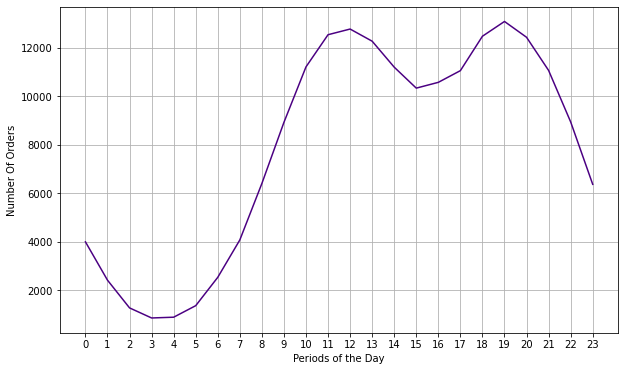

In [20]:
# visualizing data
order_p = data.groupby(["Period"])["Quantity Ordered"].count()
peaks = [period for period, df in data.groupby("Period")]

# plotting
plt.figure(figsize=(10, 6))
plt.plot(peaks, order_p, color="indigo")
plt.xticks(peaks)
plt.xlabel("Periods of the Day")
plt.ylabel("Number Of Orders")
plt.grid()
plt.show()

The data shows **2 peaks**, At `12hrs (12 PM)` and `19hrs (7 PM)`.
* This tells us that most customers did their shopping by mid-day or mid-evening
* This would be the best or ideal time of the day to push out adverts promoting company products

**Total Orders Per Day**

In [21]:
# counting orders per day
daily_orders = pd.DataFrame(data.groupby("Day")["Quantity Ordered"].count())
daily_orders

,Quantity Ordered
Day,
Friday,26202
Monday,27503
Saturday,26419
Sunday,26616
Thursday,27019
Tuesday,28276
Wednesday,27050


In [22]:
# setting our DataFrame to a shorthand variable name
daily_df = pd.DataFrame(daily_orders)

# month order
sort_day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# resetting index
daily_df = daily_df.reset_index(drop=False)

# adding new month index, to help with categorical sorting
daily_df.index = pd.Categorical(daily_df['Day'], categories=sort_day, ordered=True)

# sorting with the month index and dropping it right after
daily_df = daily_df.sort_index().reset_index(drop = True)

daily_df

,Day,Quantity Ordered
0,Sunday,26616
1,Monday,27503
2,Tuesday,28276
3,Wednesday,27050
4,Thursday,27019
5,Friday,26202
6,Saturday,26419


**Total Sales per Day**

In [23]:
# summing sales per day
daily_sales = pd.DataFrame(data.groupby("Day")["Sales"].sum())
daily_sales

,Sales
Day,
Friday,4831476.71
Monday,5024344.47
Saturday,4885674.00
Sunday,4950319.05
Thursday,4967299.71
Tuesday,5280222.53
Wednesday,5139695.31


In [24]:
# setting our DataFrame to a shorthand variable name
sales_df = pd.DataFrame(daily_sales)

# month order
sort_day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# resetting index
sales_df = sales_df.reset_index(drop=False)

# adding new month index, to help with categorical sorting
sales_df.index = pd.Categorical(sales_df['Day'], categories=sort_day, ordered=True)

# sorting with the month index and dropping it right after
sales_df =sales_df.sort_index().reset_index(drop = True)

sales_df

,Day,Sales
0,Sunday,4950319.05
1,Monday,5024344.47
2,Tuesday,5280222.53
3,Wednesday,5139695.31
4,Thursday,4967299.71
5,Friday,4831476.71
6,Saturday,4885674.00


**The chart below renders some visualizations;**
* `Total Orders per Day` and `Total Sales per Day` against `Days` 

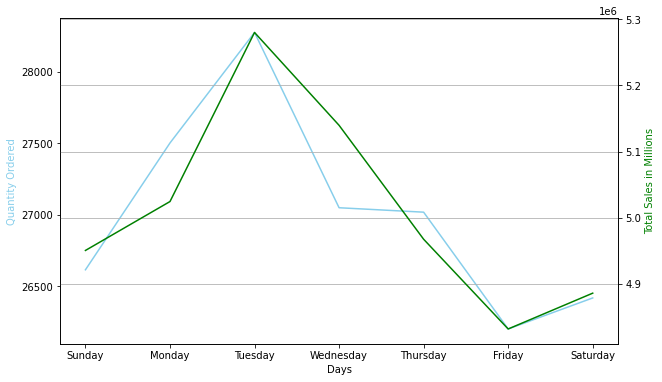

In [25]:
# setting chart parameters
days = sales_df["Day"]
orders_pd = daily_df['Quantity Ordered']
sales_pd = sales_df['Sales']

# plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
ax1.plot(days, orders_pd, color="skyblue")
ax2.plot(days, sales_pd, color="green")

# labelling plot
ax1.set_xlabel("Days")
ax1.set_ylabel("Quantity Ordered", color="skyblue")
ax2.set_ylabel("Total Sales in Millions",  color="green")

plt.grid()
plt.show()

### Cities


***
* Which cities spent the most, `City Sales Trend`
* Which cities made the most orders, `Orders per City Trend`
***

In [29]:
# sales per city
spenddata = pd.DataFrame(data.groupby("City State")["Sales"].sum())
spenddata

,Sales
City State,
Atlanta GA,2848142.13
Austin TX,1837719.06
Boston MA,3714458.62
Dallas TX,2797839.19
Los Angeles CA,5573987.54
New York City NY,4740706.99
Portland ME,461778.47
Portland OR,1913025.22
San Francisco CA,8387121.37


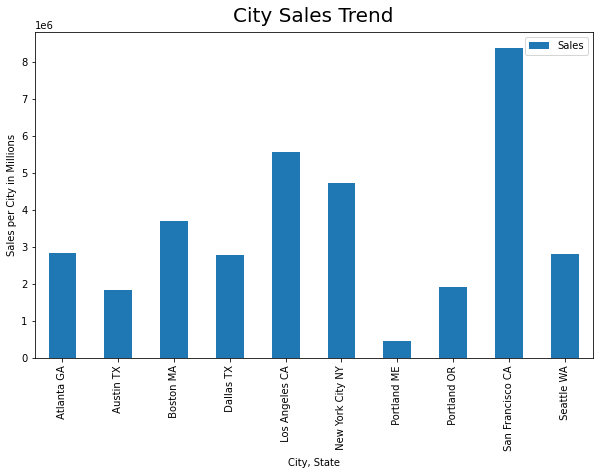

In [30]:
# extrapolating data
spend_df = data.groupby("City State").sum()
spend_df = spend_df.sort_index().reset_index(drop=False)

# plotting
spend_df.plot.bar("City State", "Sales", width=0.5, figsize=(10, 6))
plt.title("City Sales Trend", fontsize=20, pad=10)
plt.xticks(rotation="vertical")
plt.xlabel("City, State", size=10)
plt.ylabel("Sales per City in Millions", size=10)

plt.show()

In [32]:
# orders per city
orderdata = pd.DataFrame(data.groupby("City State")["Quantity Ordered"].count())
orderdata

,Quantity Ordered
City State,
Atlanta GA,15108
Austin TX,10038
Boston MA,20204
Dallas TX,14968
Los Angeles CA,30175
New York City NY,25329
Portland ME,2510
Portland OR,10209
San Francisco CA,45572


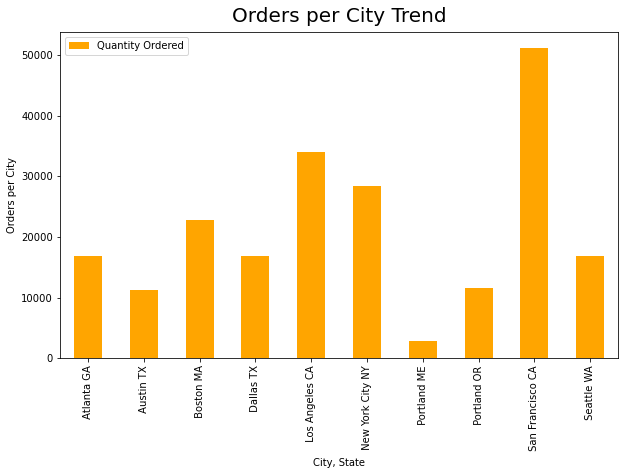

In [33]:
# extrapolating data
city_orders = data.groupby("City State").count()
city_orders = city_orders.sort_index().reset_index(drop=False)   

# plotting
spend_df.plot.bar("City State", "Quantity Ordered", width=0.5, color="orange", figsize=(10, 6)) 
plt.title("Orders per City Trend", fontsize=20, pad=10)
plt.xticks(rotation="vertical")
plt.xlabel("City, State", size=10)
plt.ylabel("Orders per City", size=10) 

plt.show()

> #### Monthly Sales Average

In [36]:
# grouping data based on average monthly sales for the year
mth_average = data.groupby("Month")["Sales"].sum().mean()
mth_average

2923252.6483333334

> #### Sales Average per City

In [38]:
# grouping data based on average city sales for the year
city_average = data.groupby("City State")["Sales"].sum().mean()
city_average

3507903.1780000003